In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

In [2]:
df_all = pd.read_csv('fanfic_regression_data_merged_chs.tsv', sep = '\t')

In [3]:
len(df_all)

71215

In [4]:
df_all['Topic_novelty'].head()

0    0.105213
1    0.180222
2    0.279718
3    0.235651
4    0.402880
Name: Topic_novelty, dtype: float64

In [5]:
df_all = df_all.replace([np.inf, -np.inf], np.nan)
df_all = df_all.fillna(0)
term_ave = np.average(df_all['Term_novelty'])
topic_ave = np.average(df_all['Topic_novelty'])
df_all['Term_novelty_cent'] = df_all['Term_novelty'] - term_ave
df_all['Topic_novelty_cent'] = df_all['Topic_novelty'] - topic_ave
df_all['Term_novelty_squared'] = np.square(df_all['Term_novelty_cent'])
df_all['Topic_novelty_squared'] = np.square(df_all['Topic_novelty_cent'])

In [6]:
df_all['Topic_novelty_squared'].head()

0    0.031898
1    0.010731
2    0.000017
3    0.002320
4    0.014177
Name: Topic_novelty_squared, dtype: float64

In [7]:
len(df_all)

71215

In [37]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor


In [38]:
# df_all = df_all.replace([np.inf, -np.inf], np.nan)
# df_all = df_all.dropna(how = 'any')

In [39]:
# df_all = df_all[['Chapters',\
#         'Term_novelty', 'Term_novelty_squared', 'Topic_novelty', 'Topic_novelty_squared',\
#         'Freq_relationship', 'Category_F_M',\
#        'Category_Gen', 'Category_M_M', 'Category_Multi', 'Category_Other','Category_Unknown', \
#        'ArchiveWarnings_underage', 'ArchiveWarnings_death',\
#        'ArchiveWarnings_choose_no', 'ArchiveWarnings_no_apply',\
#        'ArchiveWarnings_violence','ArchiveWarnings_noncon',\
#        'author_fic_cnt', 'Rating_G',\
#        'Rating_M', 'Rating_N', 'Rating_T',\
#        'Fandom_dcu', 'Fandom_doctor_who', 'Fandom_star_wars',
#        'Fandom_arthurian', 'Fandom_supernatural', 'Fandom_haikyuu',
#        'Fandom_kuroko_no_basuke', 'Fandom_hamilton_miranda',
#        'Fandom_dragon_age', 'Fandom_the_walking_dead', 'Fandom_buffy',
#        'Fandom_les_miserables', 'Fandom_naruto', 'Fandom_tolkien',
#        'Fandom_shakespare', 'Fandom_hetalia', 'Fandom_attack_on_titan',
#        'Fandom_ms_paint_adventures', 'Fandom_marvel',
#        'Fandom_sailor_moon', 'Fandom_one_direction', 'Fandom_sherlock',
#        'History']]

In [40]:
# for i in range(len(df_all.columns.values)):
#     print(df_all.columns.values[i], variance_inflation_factor(df_all.values, i))

### Logistic

In [8]:
df_all.columns.values

array(['Bookmarks', 'Chapters', 'Hits', 'Kudos', 'Words', 'Comments',
       'Term_novelty', 'Text', 'Dist', 'Topic_novelty',
       'Freq_relationship', 'Category_F_F', 'Category_F_M',
       'Category_Gen', 'Category_M_M', 'Category_Multi', 'Category_Other',
       'Category_Unknown', 'ArchiveWarnings_underage',
       'ArchiveWarnings_death', 'ArchiveWarnings_choose_no',
       'ArchiveWarnings_no_apply', 'ArchiveWarnings_violence',
       'ArchiveWarnings_noncon', 'author_fic_cnt', 'Rating_E', 'Rating_G',
       'Rating_M', 'Rating_N', 'Rating_T', 'Fandom_harry_potter',
       'Fandom_dcu', 'Fandom_doctor_who', 'Fandom_star_wars',
       'Fandom_arthurian', 'Fandom_supernatural', 'Fandom_haikyuu',
       'Fandom_kuroko_no_basuke', 'Fandom_hamilton_miranda',
       'Fandom_dragon_age', 'Fandom_the_walking_dead', 'Fandom_buffy',
       'Fandom_les_miserables', 'Fandom_naruto', 'Fandom_tolkien',
       'Fandom_shakespare', 'Fandom_hetalia', 'Fandom_attack_on_titan',
       'Fandom_ms_

In [9]:
def run_logit(df, field):
    df['Intercept'] = 1.0
    df['binary'] = df[field].apply(lambda x: 1 if x != 0.0 else 0)
    logit_model = sm.Logit(df['binary'], df[['Chapters',\
        'Term_novelty', 'Term_novelty_squared', 'Topic_novelty', 'Topic_novelty_squared',\
        'Freq_relationship', 'Category_F_M',\
       'Category_Gen', 'Category_M_M', 'Category_Multi', 'Category_Other','Category_Unknown', \
       'ArchiveWarnings_underage', 'ArchiveWarnings_death',\
       'ArchiveWarnings_choose_no', 'ArchiveWarnings_noncon',\
       'ArchiveWarnings_violence',\
       'author_fic_cnt', 'Rating_G',\
       'Rating_M', 'Rating_N', 'Rating_T', \
       'Fandom_dcu', 'Fandom_doctor_who', 'Fandom_star_wars',
       'Fandom_arthurian', 'Fandom_supernatural', 'Fandom_haikyuu',
       'Fandom_kuroko_no_basuke', 'Fandom_hamilton_miranda',
       'Fandom_dragon_age', 'Fandom_the_walking_dead', 'Fandom_buffy',
       'Fandom_les_miserables', 'Fandom_naruto', 'Fandom_tolkien',
       'Fandom_shakespare', 'Fandom_hetalia', 'Fandom_attack_on_titan',
       'Fandom_ms_paint_adventures', 'Fandom_marvel',
       'Fandom_sailor_moon', 'Fandom_one_direction', 'Fandom_sherlock', 'History',
        'Intercept']]).fit(method='bfgs')
    pred = logit_model.predict()
    df['nonzero_prob'] = pred
    return df

### OLS

In [29]:
def run_ols(df, field):
#     df = run_logit(df, field)
    df = df[df[field] != 0]
    df['Kudos'] = np.log(df['Kudos'])
    df['Hits'] = np.log(df['Hits'])
    df['Comments'] = np.log(df['Comments'])
    df['Bookmarks'] = np.log(df['Bookmarks'])
    df = df.replace([np.inf, -np.inf], np.nan)
    df = df.dropna(how = 'any')
    model = ols( field + " ~ Term_novelty + Term_novelty_squared + Topic_novelty + Topic_novelty_squared\
 + Chapters + Freq_relationship + author_fic_cnt\
 + Category_Gen + Category_F_M + Category_M_M + Category_Multi + Category_Other + Category_Unknown \
 + ArchiveWarnings_underage + ArchiveWarnings_death + ArchiveWarnings_violence +\
 ArchiveWarnings_choose_no +\
 ArchiveWarnings_noncon + Rating_N + Rating_E + Rating_M + Rating_T\
 + Fandom_dcu + Fandom_doctor_who + Fandom_star_wars + Fandom_arthurian + \
 Fandom_supernatural + Fandom_haikyuu + Fandom_kuroko_no_basuke + Fandom_hamilton_miranda\
 + Fandom_dragon_age + Fandom_the_walking_dead + Fandom_buffy + Fandom_les_miserables \
 + Fandom_naruto + Fandom_tolkien + Fandom_shakespare + Fandom_hetalia + \
 Fandom_attack_on_titan + Fandom_ms_paint_adventures +\
 Fandom_marvel + Fandom_sailor_moon + Fandom_one_direction + Fandom_sherlock", data = df).fit()
    return model

In [18]:
df_all.head()

,Bookmarks,Chapters,Hits,Kudos,Words,Comments,Term_novelty,Text,Dist,Topic_novelty,...,Fandom_sailor_moon,Fandom_one_direction,Fandom_sherlock,History,Term_novelty_cent,Topic_novelty_cent,Term_novelty_squared,Topic_novelty_squared,Intercept,binary
0,1,5,2091.0,41.0,3004.0,2,0.289051,"\nStar WarsReign of the ConfederacyFinally, af...","[1.6693486e-05, 1.6693486e-05, 1.6693486e-05, ...",0.105213,...,0,0,0,2444.0,-0.219040,-0.178600,0.047979,0.031898,1.0,1
1,3,1,209.0,10.0,604.0,2,0.903670,\nObi Wan is almost more surprised than the re...,"[7.702042e-05, 7.702042e-05, 7.702042e-05, 7.7...",0.180222,...,0,0,0,2445.0,0.395579,-0.103591,0.156482,0.010731,1.0,1
2,2,1,302.0,4.0,1655.0,0,0.202239,\nTitle: Jagged HeartsAuthor: bactaqueenRating...,"[2.707458e-05, 2.707458e-05, 2.707458e-05, 2.7...",0.279718,...,0,0,0,2448.0,-0.305852,-0.004095,0.093545,0.000017,1.0,1
3,6,16,399.0,13.0,57542.0,5,0.900934,Title: Changing Course: Chapter OneAuthor: bac...,"[8.5000823e-07, 8.5000823e-07, 8.5000823e-07, ...",0.235651,...,0,0,0,2446.0,0.392843,-0.048162,0.154325,0.002320,1.0,1
4,79,1,9347.0,363.0,8515.0,19,0.255760,"\nThey were fighting.\nHarsh and violent, they...","[5.481338e-06, 5.481338e-06, 5.481338e-06, 5.4...",0.402880,...,0,0,0,2453.0,-0.252331,0.119067,0.063671,0.014177,1.0,1


In [19]:
df_all.sort_values(by='Kudos').head()

,Bookmarks,Chapters,Hits,Kudos,Words,Comments,Term_novelty,Text,Dist,Topic_novelty,...,Fandom_sailor_moon,Fandom_one_direction,Fandom_sherlock,History,Term_novelty_cent,Topic_novelty_cent,Term_novelty_squared,Topic_novelty_squared,Intercept,binary
60753,0,2,52.0,1.0,1273.0,1,0.338019,His brother\xe2\x80\x99s tears were cold now a...,"[3.918599e-05, 3.918599e-05, 3.918599e-05, 3.9...",0.426915,...,0,0,0,1266.0,-0.170072,0.143101,0.028925,0.020478,1.0,1
42439,0,3,209.0,1.0,4462.0,0,0.177484,Jonathan felt as though he\xe2\x80\x99d made t...,"[0.07378841, 0.01197749, 0.0132892495, 0.02394...",0.110439,...,0,0,0,2932.0,-0.330607,-0.173374,0.109301,0.030059,1.0,1
11685,0,1,62.0,1.0,925.0,4,0.267411,"\nSince I became king, I had to rule alone.\nI...","[0.036970783, 4.6742767e-05, 4.6742767e-05, 0....",0.250883,...,0,0,0,2653.0,-0.240680,-0.032930,0.057927,0.001084,1.0,1
55928,0,1,208.0,1.0,542.0,0,0.792198,\nHe doesn\'t just appear in her dreams now. N...,"[8.1400925e-05, 8.1400925e-05, 0.0004748556, 8...",0.501322,...,0,0,0,2446.0,0.284107,0.217508,0.080717,0.047310,1.0,1
42463,0,1,167.0,1.0,1583.0,0,0.258319,\n\n\xe2\x80\x9cXander? If you ever decide to...,"[3.6635432e-05, 3.6635432e-05, 3.6635432e-05, ...",0.170153,...,0,0,0,2929.0,-0.249772,-0.113661,0.062386,0.012919,1.0,1


### Plot coefficients

In [39]:
kudos_model = run_ols(df_all, 'Kudos')
kudos_coef = np.asarray(list(kudos_model.params)[1:])
kudos_err = list(kudos_model.bse)[1:]

/anaconda3/envs/python36/lib/python3.6/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [21]:
ylabels =['Term novelty', 'Term novelty squared', 'Topic novelty', 'Topic novelty squared', 'Chapters', \
 'Frequent relationship',' Author work count', 'Words'\
 'Category (General)','Category (Female/Male)',' Category (Male/Male) ',' Category (Multiple)','Category (Other)','Category (Unknown)\
 ','ArchiveWarnings (Underage)','ArchiveWarnings (Death)',' ArchiveWarnings (Violence)','ArchiveWarnings (Choose not to use)','\
 ArchiveWarnings (Non-consensual sex)','Rating (Not rated)', 'Rating (Explicit)','Rating (Mature)',' Rating (Teens)\
 ',' Fandom (DC) ',' Fandom (Doctor Who) ',' Fandom (Star Wars) ',' Fandom (Arthurian Mythologies)',\
  'Fandom (Supernatural)','Fandom (Haikyuu)',' Fandom (Kuroko no Basuke)',' Fandom (Hamilton (by Miranda))\
 ',' Fandom (Dragon Age)',' Fandom (The Walking Dead)',' Fandom (Buffy the Vampire Slayer)','Fandom (Les Miserables)\
 ',' Fandom (Naruto)','Fandom (Works of J.R.R.Tolkien)',' Fandom (Works of William Shakespare)','Fandom (Hetalia: Axis Powers)',' \
 Fandom (Attack on Titan)',' Fandom (MS Paint Adventures)','\
Fandom (Marvel)',' Fandom (Sailor Moon)',' Fandom (One Direction)','Fandom (Sherlock Holmes)'][::-1]

In [40]:
hits_model = run_ols(df_all, 'Hits')
hits_coef = list(hits_model.params)[1:]
hits_err = list(hits_model.bse)[1:]

/anaconda3/envs/python36/lib/python3.6/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [41]:
comments_model = run_ols(df_all, 'Comments')
comments_coef = list(comments_model.params)[1:]
comments_err = list(comments_model.bse)[1:]

/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [42]:
bookmarks_model = run_ols(df_all, 'Bookmarks')
bookmarks_coef = list(bookmarks_model.params)[1:]
bookmarks_err = list(bookmarks_model.bse)[1:]

/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/anaconda3/envs/python36/lib/python3.6/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/anaconda3/envs/python36/lib/python3.6/si

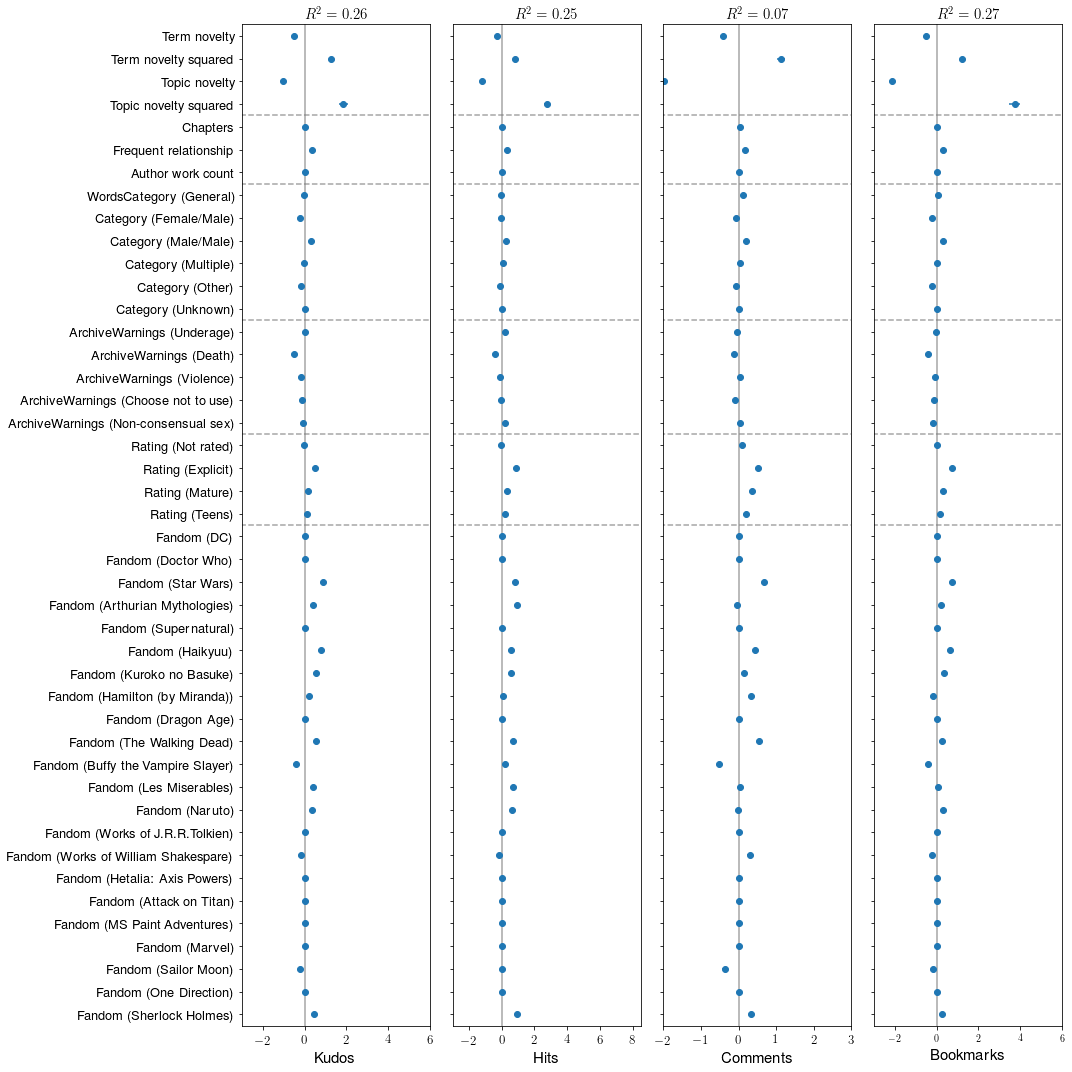

In [43]:
fig, ax = plt.subplots(1,4,figsize = (15,15))
ax[0].errorbar(kudos_coef[::-1], range(len(kudos_coef)), xerr=kudos_err[::-1] , fmt='o')

ax[0].set_yticks(range(len(kudos_coef)))
ax[0].set_yticklabels(ylabels)
ax[0].plot([0 for i in range(len(kudos_coef)+2)], range(-1,len(kudos_coef)+1), c='grey', alpha = 0.7)
ax[0].plot(range(-8,8), [21.5 for i in range(-8,8)] ,c='grey', alpha = 0.7, ls='dashed')
ax[0].plot(range(-8,8), [25.5 for i in range(-8,8)] ,c='grey', alpha = 0.7, ls='dashed')
ax[0].plot(range(-8,8), [30.5 for i in range(-8,8)] ,c='grey', alpha = 0.7, ls='dashed')
ax[0].plot(range(-8,8), [36.5 for i in range(-8,8)] ,c='grey', alpha = 0.7, ls='dashed')
ax[0].plot(range(-8,8), [39.5 for i in range(-8,8)] ,c='grey', alpha = 0.7, ls='dashed')
ax[0].set_ylim(-0.5,43.5)
ax[0].set_xlim(-3,6)
ax[0].set_xlabel('Kudos', fontsize=15)
ax[0].set_title('$R^2 = 0.26$', fontsize=15)
for tick in ax[0].yaxis.get_major_ticks():
    tick.label.set_fontsize(13)
for tick in ax[0].xaxis.get_major_ticks():
    tick.label.set_fontsize(13)
    
ax[1].errorbar(hits_coef[::-1], range(len(hits_err)), xerr=hits_err[::-1], fmt='o')
ax[1].set_yticks(range(len(hits_coef)))
# ax[1].set_yticklabels(ylabels)
ax[1].plot([0 for i in range(len(hits_coef)+2)], range(-1,len(hits_coef)+1), c='grey', alpha = 0.7)
ax[1].plot(range(-8,10), [21.5 for i in range(-8,10)] ,c='grey', alpha = 0.7, ls='dashed')
ax[1].plot(range(-8,10), [25.5 for i in range(-8,10)] ,c='grey', alpha = 0.7, ls='dashed')
ax[1].plot(range(-8,10), [30.5 for i in range(-8,10)] ,c='grey', alpha = 0.7, ls='dashed')
ax[1].plot(range(-8,10), [36.5 for i in range(-8,10)] ,c='grey', alpha = 0.7, ls='dashed')
ax[1].plot(range(-8,10), [39.5 for i in range(-8,10)] ,c='grey', alpha = 0.7, ls='dashed')
ax[1].set_ylim(-0.5,43.5)
ax[1].set_xlim(-3,8.5)
ax[1].set_yticklabels([])
ax[1].set_title('$R^2 = 0.25$', fontsize=15)
ax[1].set_xlabel('Hits', fontsize=15)
for tick in ax[1].xaxis.get_major_ticks():
    tick.label.set_fontsize(13)
    
ax[2].errorbar(comments_coef[::-1], range(len(comments_err)), xerr=comments_err[::-1], fmt='o')
ax[2].set_yticks(range(len(comments_coef)))
ax[2].plot([0 for i in range(len(comments_coef)+2)], range(-1,len(comments_coef)+1), c='grey', alpha = 0.7)
ax[2].plot(range(-8,8), [21.5 for i in range(-8,8)] ,c='grey', alpha = 0.7, ls='dashed')
ax[2].plot(range(-8,8), [25.5 for i in range(-8,8)] ,c='grey', alpha = 0.7, ls='dashed')
ax[2].plot(range(-8,8), [30.5 for i in range(-8,8)] ,c='grey', alpha = 0.7, ls='dashed')
ax[2].plot(range(-8,8), [36.5 for i in range(-8,8)] ,c='grey', alpha = 0.7, ls='dashed')
ax[2].plot(range(-8,8), [39.5 for i in range(-8,8)] ,c='grey', alpha = 0.7, ls='dashed')
ax[2].set_ylim(-0.5,43.5)
ax[2].set_xlim(-2,3)
ax[2].set_yticklabels([])
ax[2].set_title('$R^2 = 0.07$', fontsize=15)
ax[2].set_xlabel('Comments', fontsize=15)
for tick in ax[2].xaxis.get_major_ticks():
    tick.label.set_fontsize(13)

ax[3].errorbar(bookmarks_coef[::-1], range(len(bookmarks_err)), xerr=bookmarks_err[::-1], fmt='o')
ax[3].set_yticks(range(len(bookmarks_coef)))
ax[3].plot([0 for i in range(len(bookmarks_coef)+2)], range(-1,len(bookmarks_coef)+1), c='grey', alpha = 0.7)
ax[3].plot(range(-8,8), [21.5 for i in range(-8,8)] ,c='grey', alpha = 0.7, ls='dashed')
ax[3].plot(range(-8,8), [25.5 for i in range(-8,8)] ,c='grey', alpha = 0.7, ls='dashed')
ax[3].plot(range(-8,8), [30.5 for i in range(-8,8)] ,c='grey', alpha = 0.7, ls='dashed')
ax[3].plot(range(-8,8), [36.5 for i in range(-8,8)] ,c='grey', alpha = 0.7, ls='dashed')
ax[3].plot(range(-8,8), [39.5 for i in range(-8,8)] ,c='grey', alpha = 0.7, ls='dashed')
ax[3].set_ylim(-0.5,43.5)
ax[3].set_xlim(-3,6)
ax[3].set_yticklabels([])
ax[3].set_title('$R^2 =  0.27$', fontsize=15)
ax[3].set_xlabel('Bookmarks', fontsize=15)
for tick in ax[2].xaxis.get_major_ticks():
    tick.label.set_fontsize(13)
    
# fig.text(0.55, 0.001, 'N = 609716', fontsize = 15)
plt.tight_layout()
plt.savefig('ols_coefs_full_twoparts.pdf', format='pdf')

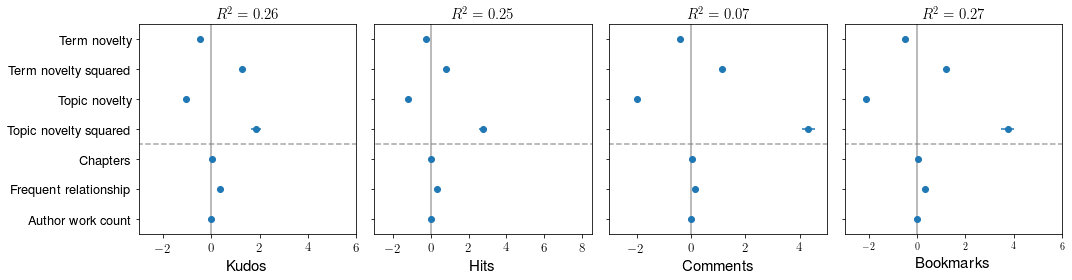

In [45]:
fig, ax = plt.subplots(1,4,figsize = (15,4))
ax[0].errorbar(kudos_coef[::-1], range(len(kudos_coef)), xerr=kudos_err[::-1] , fmt='o')

ax[0].set_yticks(range(len(kudos_coef)))
ax[0].set_yticklabels(ylabels)
ax[0].plot([0 for i in range(len(kudos_coef)+2)], range(-1,len(kudos_coef)+1), c='grey', alpha = 0.7)
ax[0].plot(range(-8,8), [39.5 for i in range(-8,8)] ,c='grey', alpha = 0.7, ls='dashed')
ax[0].set_ylim(36.5,43.5)
ax[0].set_xlim(-3,6)
ax[0].set_xlabel('Kudos', fontsize=15)
ax[0].set_title('$R^2 = 0.26$', fontsize=15)
for tick in ax[0].yaxis.get_major_ticks():
    tick.label.set_fontsize(13)
for tick in ax[0].xaxis.get_major_ticks():
    tick.label.set_fontsize(13)
    
ax[1].errorbar(hits_coef[::-1], range(len(hits_err)), xerr=hits_err[::-1], fmt='o')
ax[1].set_yticks(range(len(hits_coef)))
# ax[1].set_yticklabels(ylabels)
ax[1].plot([0 for i in range(len(hits_coef)+2)], range(-1,len(hits_coef)+1), c='grey', alpha = 0.7)
ax[1].plot(range(-8,10), [39.5 for i in range(-8,10)] ,c='grey', alpha = 0.7, ls='dashed')
ax[1].set_ylim(36.5,43.5)
ax[1].set_xlim(-3,8.5)
ax[1].set_yticklabels([])
ax[1].set_title('$R^2 = 0.25$', fontsize=15)
ax[1].set_xlabel('Hits', fontsize=15)
for tick in ax[1].xaxis.get_major_ticks():
    tick.label.set_fontsize(13)
    
ax[2].errorbar(comments_coef[::-1], range(len(comments_err)), xerr=comments_err[::-1], fmt='o')
ax[2].set_yticks(range(len(comments_coef)))
ax[2].plot([0 for i in range(len(comments_coef)+2)], range(-1,len(comments_coef)+1), c='grey', alpha = 0.7)
ax[2].plot(range(-8,8), [39.5 for i in range(-8,8)] ,c='grey', alpha = 0.7, ls='dashed')
ax[2].set_ylim(36.5,43.5)
ax[2].set_xlim(-3,5)
ax[2].set_yticklabels([])
ax[2].set_title('$R^2 = 0.07$', fontsize=15)
ax[2].set_xlabel('Comments', fontsize=15)
for tick in ax[2].xaxis.get_major_ticks():
    tick.label.set_fontsize(13)

ax[3].errorbar(bookmarks_coef[::-1], range(len(bookmarks_err)), xerr=bookmarks_err[::-1], fmt='o')
ax[3].set_yticks(range(len(bookmarks_coef)))
ax[3].plot([0 for i in range(len(bookmarks_coef)+2)], range(-1,len(bookmarks_coef)+1), c='grey', alpha = 0.7)
ax[3].plot(range(-8,8), [39.5 for i in range(-8,8)] ,c='grey', alpha = 0.7, ls='dashed')
ax[3].set_ylim(36.5,43.5)
ax[3].set_xlim(-3,6)
ax[3].set_yticklabels([])
ax[3].set_title('$R^2 = 0.27$', fontsize=15)
ax[3].set_xlabel('Bookmarks', fontsize=15)
for tick in ax[2].xaxis.get_major_ticks():
    tick.label.set_fontsize(13)
    
# fig.text(0.55, 0.001, 'N = 609716', fontsize = 15)
plt.tight_layout()
plt.savefig('ols_coefs_partial_twoparts.pdf', format='pdf')

In [30]:
print(kudos_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Kudos   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     563.3
Date:                Thu, 10 Oct 2019   Prob (F-statistic):               0.00
Time:                        16:16:41   Log-Likelihood:                -68638.
No. Observations:               51014   AIC:                         1.373e+05
Df Residuals:                   50981   BIC:                         1.376e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/base/model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/anaconda3/envs/python36/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/envs/python36/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/envs/python36/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [25]:
print(hits_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Hits   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     2069.
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        16:44:43   Log-Likelihood:            -4.2437e+05
No. Observations:              287139   AIC:                         8.488e+05
Df Residuals:                  287093   BIC:                         8.493e+05
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [26]:
print(comments_model.summary())

                            OLS Regression Results                            
Dep. Variable:               Comments   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     451.7
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        16:44:43   Log-Likelihood:            -3.7862e+05
No. Observations:              287139   AIC:                         7.573e+05
Df Residuals:                  287094   BIC:                         7.578e+05
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [27]:
print(bookmarks_model.summary())

                            OLS Regression Results                            
Dep. Variable:              Bookmarks   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     2362.
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        16:44:44   Log-Likelihood:            -4.4436e+05
No. Observations:              287139   AIC:                         8.888e+05
Df Residuals:                  287093   BIC:                         8.893e+05
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [27]:
# fig = plt.figure(figsize=(20,20))
# fig = sm.graphics.plot_regress_exog(kudos_model, "Term_novelty", fig=fig)
# plt.savefig('partial_reg_plots_term_novelty.png', format='png')